In [69]:
import dash
import dash_cytoscape as cyto
from dash import html, dcc
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash
from jupyter_dash.comms import _send_jupyter_config_comm_request

In [70]:
_send_jupyter_config_comm_request()

In [72]:
JupyterDash.infer_jupyter_proxy_config()

In [73]:
import requests
KLurl = "https://www.gutenberg.org/cache/epub/1532/pg1532.txt"
r = requests.get(KLurl,allow_redirects=True)
KLurl = r.text

In [74]:
trimmedKL = KLurl[2773:]
# begin analysis of work after table of contents and character list

specialchars = '\r\n\r\n\r\,-:*1234567890<>'
for c in specialchars:
    trimmedKL = trimmedKL.replace(c,' ')
# clean extra characters

In [75]:
trimmedKL.split('ACT')[1].split('SCENE')[1]
# taking a look at act 1 scene 1 of King Lear

' I. A Room of State in King Lear’s Palace.     Enter Kent  Gloucester and Edmund.    KENT.  I thought the King had more affected the Duke of Albany than Cornwall.    GLOUCESTER.  It did always seem so to us; but now  in the division of the kingdom   it appears not which of the Dukes he values most  for qualities are so  weighed that curiosity in neither can make choice of either’s moiety.    KENT.  Is not this your son  my lord?    GLOUCESTER.  His breeding  sir  hath been at my charge  I have so often  blush’d to acknowledge him that now I am braz’d to’t.    KENT.  I cannot conceive you.    GLOUCESTER.  Sir  this young fellow’s mother could; whereupon she grew  round wombed  and had indeed  sir  a son for her cradle ere she  had a husband for her bed. Do you smell a fault?    KENT.  I cannot wish the fault undone  the issue of it being so proper.    GLOUCESTER.  But I have a son  sir  by order of law  some year elder than  this  who yet is no dearer in my account  though this knave c

In [76]:
acts = trimmedKL.split('ACT')
# split work by acts

In [77]:
characters = [
    'LEAR',
    'GONERIL',
    'REGAN',
    'CORDELIA',
    'DUKE of ALBANY',
    'DUKE of CORNWALL',
    'KING of FRANCE',
    'DUKE of BURGUNDY',
    'EARL of GLOUCESTER',
    'EDGAR',
    'EDMUND',
    'EARL of KENT',
    'FOOL',
    'OSWALD',
    'CURAN',
    'OLD MAN'
]

In [81]:
# using names of characters as nodes
# weight of edges connecting nodes increases each time characters are together in a scene

occurDict = {}

#edges between characters
charConnectDict = {}
for i in range(len(characters)-1):
    for j in range(i+1,len(characters)):
        charConnectDict[(characters[i],characters[j])] = 0
for k in characters:
    occurDict[k] = 0

#looping over acts and scenes in each act
for i in acts:
    for j in i.split('SCENE')[1:]:
        scenechars = []
        #loop over characters to see if characters have a role in that scene
        for k in characters:
            if j.find(k) != -1:
                scenechars.append(k)
                occurDict[k] += 1
        #search for character pairs, if two character names appear, increment edge weight
        for a in range(len(scenechars)-1):
            for b in range(a+1,len(scenechars)):
                charConnectDict[(scenechars[a],scenechars[b])] += 1

In [82]:
occurDict
# number of scenes characters occur in

{'LEAR': 10,
 'GONERIL': 8,
 'REGAN': 8,
 'CORDELIA': 4,
 'DUKE of ALBANY': 0,
 'DUKE of CORNWALL': 0,
 'KING of FRANCE': 0,
 'DUKE of BURGUNDY': 0,
 'EARL of GLOUCESTER': 0,
 'EDGAR': 10,
 'EDMUND': 9,
 'EARL of KENT': 0,
 'FOOL': 6,
 'OSWALD': 7,
 'CURAN': 1,
 'OLD MAN': 1}

In [83]:
charConnectDict
# all possible pairs of characters and their occurances together throughout scenes

{('LEAR', 'GONERIL'): 4,
 ('LEAR', 'REGAN'): 3,
 ('LEAR', 'CORDELIA'): 3,
 ('LEAR', 'DUKE of ALBANY'): 0,
 ('LEAR', 'DUKE of CORNWALL'): 0,
 ('LEAR', 'KING of FRANCE'): 0,
 ('LEAR', 'DUKE of BURGUNDY'): 0,
 ('LEAR', 'EARL of GLOUCESTER'): 0,
 ('LEAR', 'EDGAR'): 4,
 ('LEAR', 'EDMUND'): 2,
 ('LEAR', 'EARL of KENT'): 0,
 ('LEAR', 'FOOL'): 6,
 ('LEAR', 'OSWALD'): 2,
 ('LEAR', 'CURAN'): 0,
 ('LEAR', 'OLD MAN'): 0,
 ('GONERIL', 'REGAN'): 5,
 ('GONERIL', 'CORDELIA'): 2,
 ('GONERIL', 'DUKE of ALBANY'): 0,
 ('GONERIL', 'DUKE of CORNWALL'): 0,
 ('GONERIL', 'KING of FRANCE'): 0,
 ('GONERIL', 'DUKE of BURGUNDY'): 0,
 ('GONERIL', 'EARL of GLOUCESTER'): 0,
 ('GONERIL', 'EDGAR'): 2,
 ('GONERIL', 'EDMUND'): 4,
 ('GONERIL', 'EARL of KENT'): 0,
 ('GONERIL', 'FOOL'): 2,
 ('GONERIL', 'OSWALD'): 4,
 ('GONERIL', 'CURAN'): 0,
 ('GONERIL', 'OLD MAN'): 0,
 ('REGAN', 'CORDELIA'): 2,
 ('REGAN', 'DUKE of ALBANY'): 0,
 ('REGAN', 'DUKE of CORNWALL'): 0,
 ('REGAN', 'KING of FRANCE'): 0,
 ('REGAN', 'DUKE of BURGUNDY'

In [84]:
# taking a look at the character occurance dictionary
for keys, values in occurDict.items():
    print(keys, values)

LEAR 10
GONERIL 8
REGAN 8
CORDELIA 4
DUKE of ALBANY 0
DUKE of CORNWALL 0
KING of FRANCE 0
DUKE of BURGUNDY 0
EARL of GLOUCESTER 0
EDGAR 10
EDMUND 9
EARL of KENT 0
FOOL 6
OSWALD 7
CURAN 1
OLD MAN 1


In [85]:
# create nodes to graph in diagram
graphitems = []

for keys, values in occurDict.items():
    dashnode = {'data': {'id': keys, # character name
                         'label': keys.title(),
                         'size': str(values)}} # specify size of node
    graphitems.append(dashnode)

graphitems

[{'data': {'id': 'LEAR', 'label': 'Lear', 'size': '10'}},
 {'data': {'id': 'GONERIL', 'label': 'Goneril', 'size': '8'}},
 {'data': {'id': 'REGAN', 'label': 'Regan', 'size': '8'}},
 {'data': {'id': 'CORDELIA', 'label': 'Cordelia', 'size': '4'}},
 {'data': {'id': 'DUKE of ALBANY', 'label': 'Duke Of Albany', 'size': '0'}},
 {'data': {'id': 'DUKE of CORNWALL',
   'label': 'Duke Of Cornwall',
   'size': '0'}},
 {'data': {'id': 'KING of FRANCE', 'label': 'King Of France', 'size': '0'}},
 {'data': {'id': 'DUKE of BURGUNDY',
   'label': 'Duke Of Burgundy',
   'size': '0'}},
 {'data': {'id': 'EARL of GLOUCESTER',
   'label': 'Earl Of Gloucester',
   'size': '0'}},
 {'data': {'id': 'EDGAR', 'label': 'Edgar', 'size': '10'}},
 {'data': {'id': 'EDMUND', 'label': 'Edmund', 'size': '9'}},
 {'data': {'id': 'EARL of KENT', 'label': 'Earl Of Kent', 'size': '0'}},
 {'data': {'id': 'FOOL', 'label': 'Fool', 'size': '6'}},
 {'data': {'id': 'OSWALD', 'label': 'Oswald', 'size': '7'}},
 {'data': {'id': 'CURAN'

In [86]:
# create edges to graph in diagram

graphitems = []

for keys, values in occurDict.items():
    dashnode = {'data': {'id': keys,
                         'label': keys.title(),
                         'size': str(values)}}
    graphitems.append(dashnode)

correction_factor = max(charConnectDict.values())
print(correction_factor)
for keys, values in charConnectDict.items():
    if values != 0:
        dashedge = {'data': {'source': keys[0],
                             'target': keys[1],
                             'weight': values/correction_factor}}
        graphitems.append(dashedge)

6


In [87]:
# generate graphic
app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/alexandrafaline@gmail.com/proxy/8050/


In [88]:
# graphic styling

app = JupyterDash(__name__)

app.layout = html.Div([
    cyto.Cytoscape(
        layout={'name': 'cose'},
        elements=graphitems,
        style={'width': '100%', 'height': '80vh'},
        stylesheet=[
            # style nodes: text centering, sizing based on occurance data, color editing
            {
                'selector': 'node',
                'style': {
                    'content':'data(label)',
                    'text-halign':'center',
                    'text-valign':'center',
                    'width': 'data(size)',
                    'height': 'data(size)',
                    'font-size':4,
                    'color': 'white',
                    'background-color': '#cc6a6f',
                    'text-outline-color': '#cc6a6f',
                    'text-outline-width': 0.2,
                    'shape':'circle'
                }
            },
            # style edges: width of lines increases with incease in interactions, color editing
            {
                'selector':'edge',
                'style': {
                    'width':'data(weight)',
                    'line-color': '#ebb2b5',
                  }
            },
        ]
    )
])

app.run_server(debug=True)

Dash app running on https://jupyter.idre.ucla.edu/user/alexandrafaline@gmail.com/proxy/8050/


## Graphic and Comments/Analysis
This diagram below displays different sized nodes and edges based on character occurrances and connections within King Lear. To determine the size of the nodes, the amount of character appearances throughout each scene in King Lear was calculated. Greater occurances yeilds larger nodes on the diagram. From this graphic, we can see that Edmund, Edgar, and Lear have the most appearances in the story, since they are the largest nodes. Curan and the Old Man appear the least in the story, shown by their small node size in the diagram.

As for the graphic's edges, the edges were created by connecting nodes of characters who appeared together in same scenes. The greater appearances characters had together, the thicker the edge line (larger width). It seems as though the Fool and Lear appeared most together throughout scenes. Interestingly, it appears that the Old Man only appears with Edgar in a small amount of scenes. Lear and Edmund seems to appear in the most scenes with other characters, since they are connected to other characters with 6-7 edges.

I find it interesting that Lear does not appear significantly more than Edgar and Edmund. I have not yet read King Lear, but based on the title I would think that Lear would have significantly more appearances than all other characters. Perhaps my data needs to be cleaned further, or perhaps King Lear just doesn't appear significantly more than all other characters. Lastly, I find it interesting that the Old Man only has connection to one character. I am curious to see if this is an issue with my code or if this is true in the novel, and I plan to analyze this further. I look forward to diving deeper into this work.


### Graphic

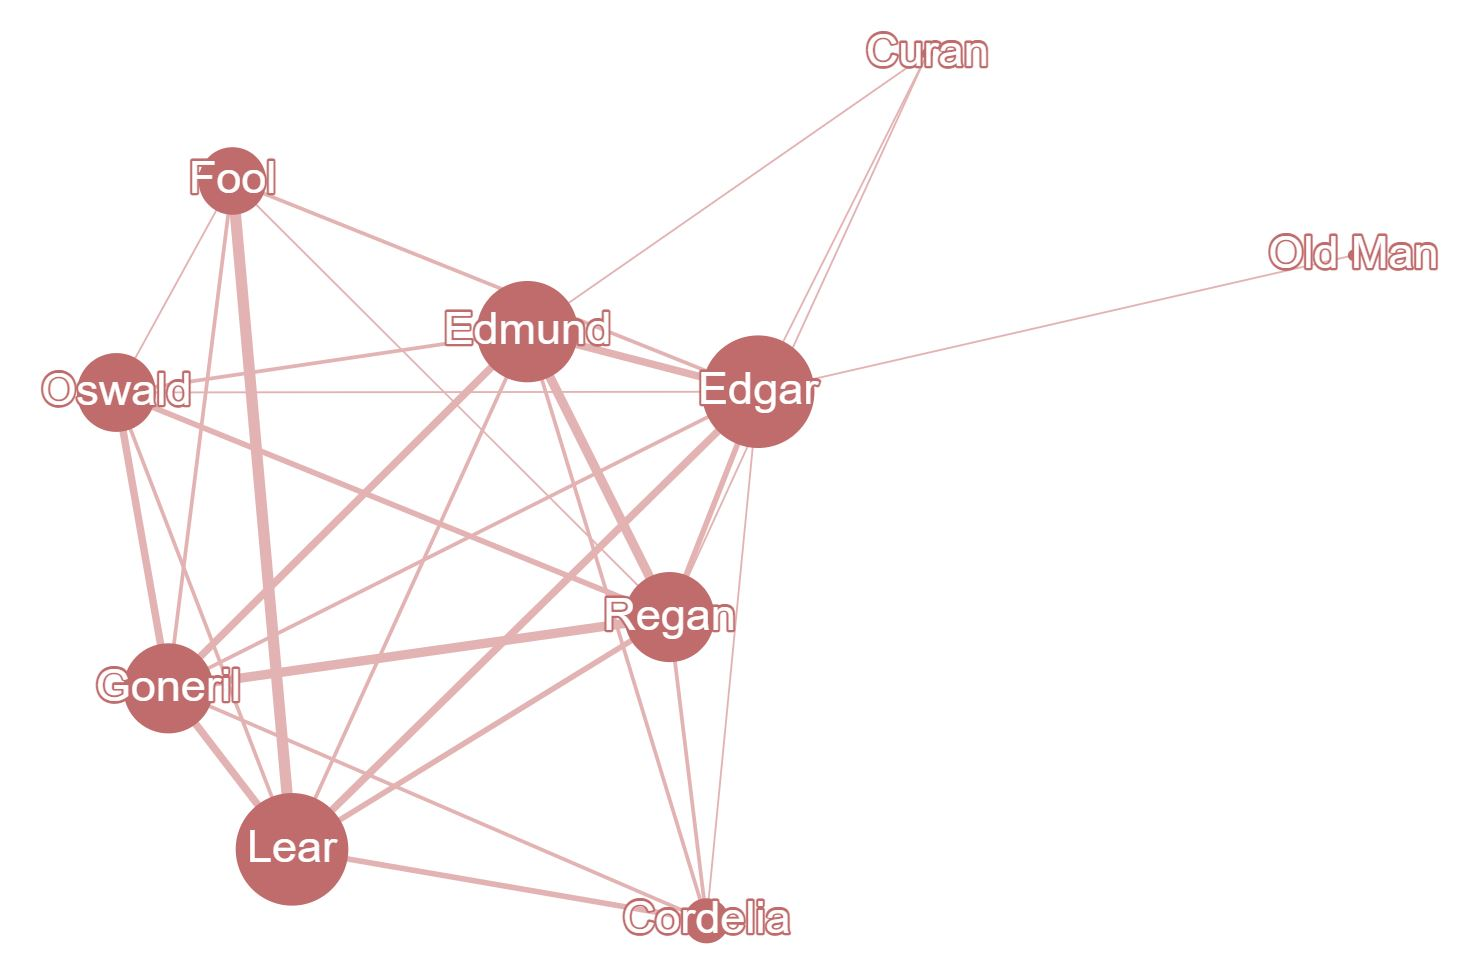

In [89]:
# display diagram using the Image library
from IPython.display import Image
Image(filename='Nodes.JPG', width = 800)